1. Обработка и выгрузка датасета и преобразование данных.

In [1]:
import pandas as pd
import sys
sys.path.append('/content/sample_data')
file_path = '/content/sample_data/titanic.csv'
import csv

# Функция загрузки данных
def load_csv_file(file_path):
  try:
    csv_file = pd.read_csv(file_path)
    print("Данные успешно загружены.")
    return csv_file
  except FileNotFoundError as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)

# Загрузка и преобразование данных
users_data = load_csv_file(file_path)
passengers_list = users_data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
users_data = [tuple(row) for row in passengers_list.to_numpy()]


Данные успешно загружены.


2. Создание и подключение базы данных. Создание таблицы, извлечение различных данных с помощью запросов. Использование агрегатных функций.

In [5]:
# Реляционная База Данных: SQLite
import sqlite3
# Подключение к базе данных SQLite
conn = sqlite3.connect('titanic.db')
cursor = conn.cursor()

# Удаление таблицы
cursor.execute("DROP TABLE IF EXISTS passengers")

# Создание таблицы
cursor.execute('''CREATE TABLE IF NOT EXISTS passengers (
  id INTEGER PRIMARY KEY,
  survived INTEGER,
  pass_class INTEGER,
  name TEXT,
  sex TEXT,
  age INTEGER,
  siblings_on_board INTEGER,
  parents_on_board INTEGER,
  price_ticket TEXT
)''')

# Загрузка данных в таблицу
try:
  cursor.executemany('''INSERT INTO passengers (
    survived,
    pass_class,
    name,
    sex,
    age,
    siblings_on_board,
    parents_on_board,
    price_ticket)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?
    )''', users_data)
except:
    pass

# Удаление записи из таблицы по определенному условию
cursor.execute("DELETE FROM passengers WHERE age = '14.5'")

# Запрос данных
cursor.execute("SELECT survived, name, age FROM passengers WHERE age < 18 AND parents_on_board = 1")
passengers = cursor.fetchall()
print(f'Список всех детей ({len(passengers)}) с родителями на борту: \n')
for pass_one in passengers:
  if pass_one[0] == 0:
    survived = 'погиб'
  else:
    survived = 'выжил'
  print(f'{pass_one[1]}, возраст: {pass_one[2]} - {survived}')

cursor.execute("SELECT COUNT(age) FROM passengers WHERE age < 18")
passengers = cursor.fetchall()
print('\nКоличество детей на борту: \n')
print(passengers[0][0])

cursor.execute("SELECT pass_class, AVG(price_ticket), COUNT(price_ticket) FROM passengers GROUP BY pass_class")
passengers = cursor.fetchall()
print('\nСредняя стоимость билета по классу: \n')
for price_ticket in passengers:
  print(f'{price_ticket[0]} класс - {round(price_ticket[1])} £s Всего {price_ticket[2]}')

cursor.execute("SELECT COUNT(sex), sex FROM passengers WHERE survived = 0 AND age > 18 GROUP BY sex ORDER BY sex DESC")
passengers = cursor.fetchall()
print('\nКоличество погибших мужчин и женщин: \n')
for survived in passengers:
  print(f'{survived[0]} - {survived[1]}')

cursor.execute("SELECT SUM(price_ticket) FROM passengers")
passengers = cursor.fetchall()
print('\nСумма стоимости всех билетов: \n')
print(f'{round(passengers[0][0])} £s')

cursor.execute("SELECT pass_class, COUNT(pass_class), survived FROM passengers GROUP BY pass_class, survived")
passengers = cursor.fetchall()
print('\nКоличество пассажиров по классу и факту выживаемости: \n')
headings = ["Класс", "Количество", "Факт смерти"]
df = pd.DataFrame(passengers, columns=headings)
print(df)

# Удаление всех записей
# cursor.execute("DELETE FROM passengers")

# Закрытие соединения и сохранение изменений
conn.commit()
conn.close()

Список всех детей (51) с родителями на борту: 

Master. Gosta Leonard Palsson, возраст: 2 - погиб
Miss. Marguerite Rut Sandstrom, возраст: 4 - выжил
Master. Eugene Rice, возраст: 2 - погиб
Miss. Torborg Danira Palsson, возраст: 8 - погиб
Master. Juha Niilo Panula, возраст: 7 - погиб
Master. Gerios Moubarek, возраст: 7 - выжил
Miss. Anna Peter, возраст: 2 - выжил
Master. Eino Viljami Panula, возраст: 1 - погиб
Master. Arthur Rice, возраст: 4 - погиб
Miss. Eleanor Ileen Johnson, возраст: 1 - выжил
Master. Henry Forbes Lefebre, возраст: 5 - погиб
Master. Richard F Becker, возраст: 1 - выжил
Master. Michel M Navratil, возраст: 3 - выжил
Miss. Telma Matilda Strom, возраст: 2 - погиб
Miss. Mathilde Lefebre, возраст: 12 - погиб
Mr. Ernesti Arvid Panula, возраст: 16 - погиб
Master. Eric Rice, возраст: 7 - погиб
Miss. Jean Gertrude Hippach, возраст: 16 - выжил
Master. Edmond Roger Navratil, возраст: 2 - выжил
Master. William Loch Coutts, возраст: 3 - выжил
Mr. Tannous Elias, возраст: 15 - погиб

3. Визуализация данных с помощью библиотеки Matplotlib.

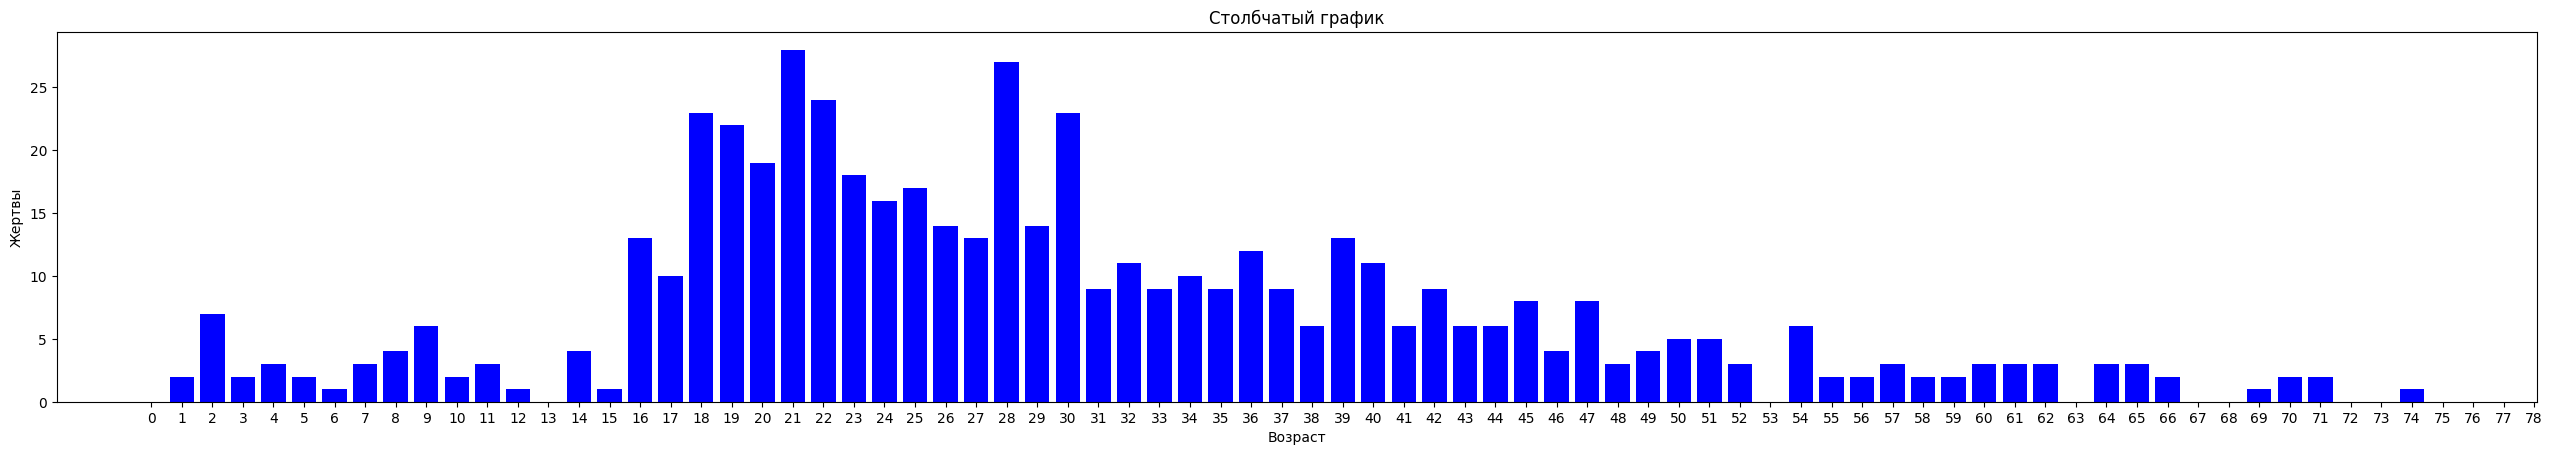

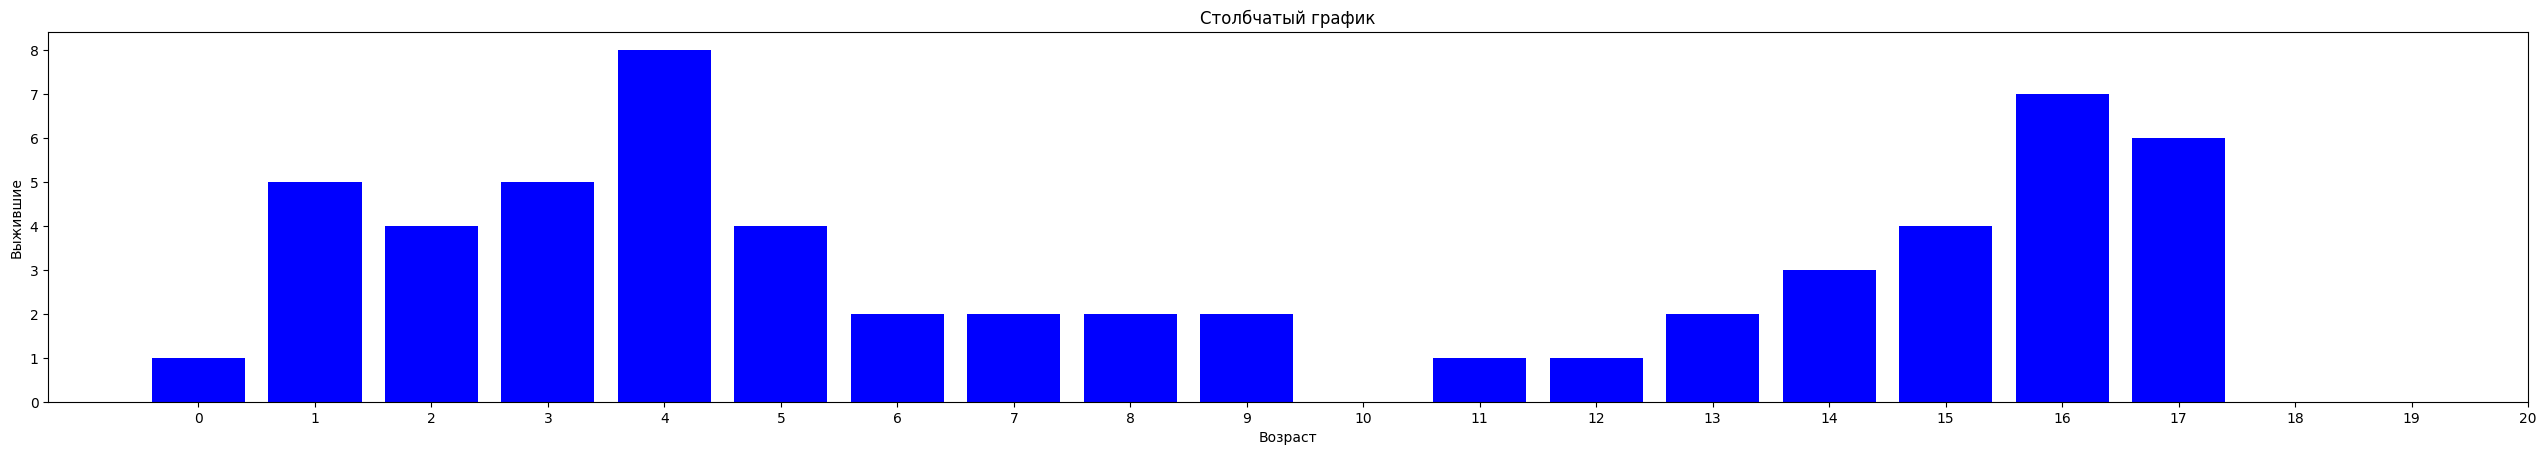

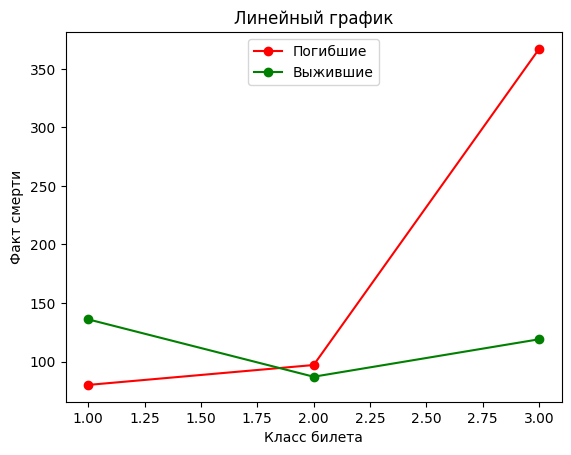

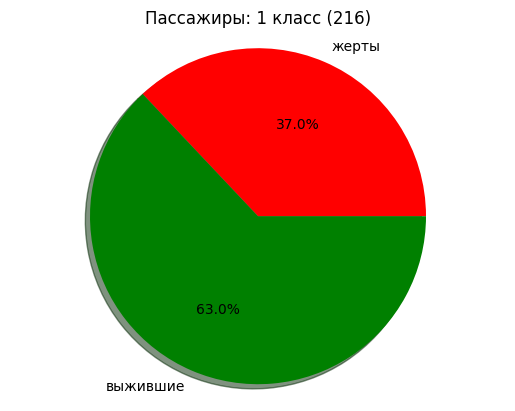

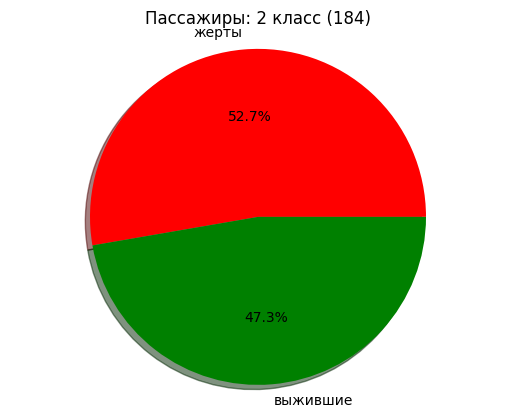

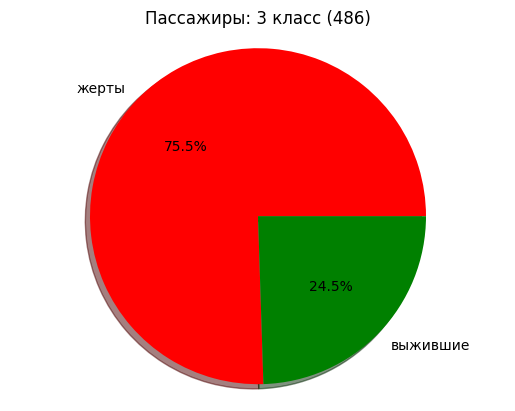

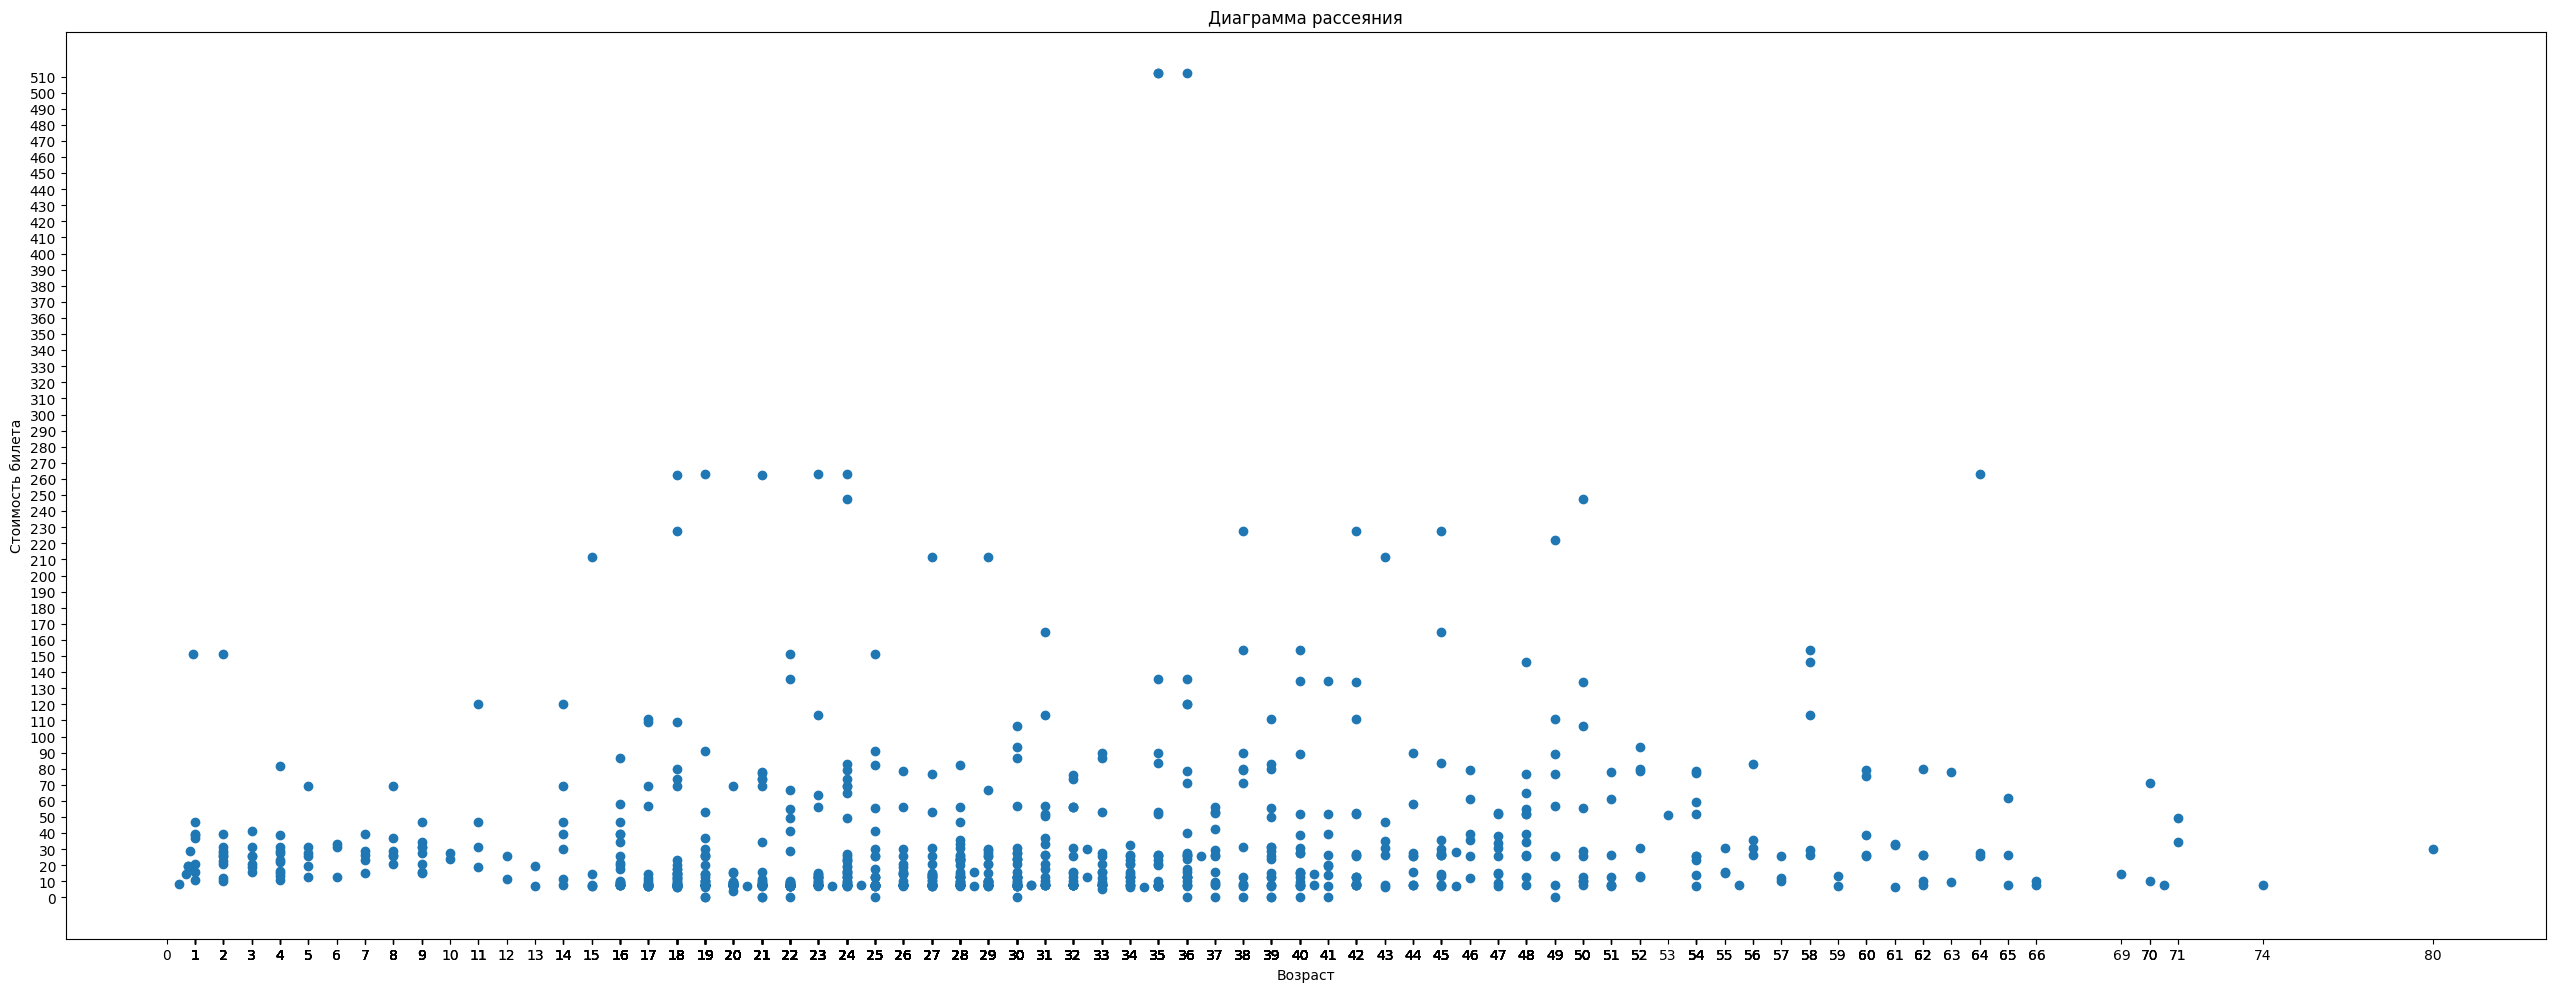

In [93]:
# Визуализация данных

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def hist(dataset, ylabel):
    plt.bar(round(dataset['age']), dataset['pass'], color='blue')
    plt.title("Столбчатый график")
    plt.xlabel("Возраст")
    plt.ylabel(ylabel)
    plt.xticks(range(len(round(dataset['age'])))), round(dataset['age'])
    plt.subplots_adjust(right=4)
    plt.show()

def line(dataset, dataset2):
    plt.plot(dataset["pass_class"], dataset["pass"], 'r-', marker='o', label='Погибшие')
    plt.plot(dataset2["pass_class"], dataset2["pass"], 'g-', marker='o', label='Выжившие')
    plt.title("Линейный график")
    plt.legend(loc=9)
    plt.xlabel("Класс билета")
    plt.ylabel("Факт смерти")
    plt.show()

def circle(pass_class):
    dataset = pd.read_sql_query(f"SELECT survived, COUNT(pass_class) as pass FROM passengers WHERE pass_class = {pass_class} GROUP BY survived ORDER BY survived ASC", conn)
    labels = ["жерты", "выжившие"]
    values = dataset["pass"]
    colors = ['red','green']
    plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Пассажиры: {pass_class} класс ({dataset['pass'][0] + dataset['pass'][1]})")
    plt.show()

def scatter(dataset):
  price_ticket = []
  for ticket in dataset['price_ticket']:
    price_ticket.append(float(ticket))
  minY = round(min(price_ticket))
  maxY = round(max(price_ticket))
  plt.scatter(dataset['age'], price_ticket)
  plt.title("Диаграмма рассеяния")
  plt.xlabel("Возраст")
  plt.ylabel("Стоимость билета")
  plt.xticks(round(dataset['age']))
  plt.yticks(np.arange(minY, maxY+1, 10))
  plt.subplots_adjust(right=4, top=2)

plt.show()
conn = sqlite3.connect('titanic.db')
cursor = conn.cursor()

dataset_lost = pd.read_sql_query("SELECT COUNT(age) as pass, age FROM passengers WHERE survived = 0 GROUP BY age", conn)
hist(dataset_lost, 'Жертвы')

dataset_survived = pd.read_sql_query("SELECT COUNT(age) as pass, age FROM passengers WHERE age < 18 AND survived = 1 GROUP BY age", conn)
hist(dataset_survived, 'Выжившие')

dataset_lost_by_ticket = pd.read_sql_query("SELECT pass_class, COUNT(pass_class) as pass FROM passengers WHERE survived = 0 GROUP BY pass_class", conn)
dataset_survived_by_ticket = pd.read_sql_query("SELECT pass_class, COUNT(pass_class) as pass FROM passengers WHERE survived = 1 GROUP BY pass_class", conn)
line(dataset_lost_by_ticket, dataset_survived_by_ticket)

circle(1)
circle(2)
circle(3)

dataset_age_price = pd.read_sql_query("SELECT age, price_ticket FROM passengers", conn)
scatter(dataset_age_price)

conn.close()